In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mportanto bibliotecas...

In [2]:
train = pd.read_csv('Safra_2018-2019.csv')
test = pd.read_csv('Safra_2020.csv')
#lendo os arquivos CSV

In [3]:
#transformando o Identificador_Agricultor como Index, já que ele é individual e único
train.set_index('Identificador_Agricultor', inplace=True)
test.set_index('Identificador_Agricultor', inplace=True)

In [4]:
train.shape, test.shape
#o test não possui a coluna de danos pois testaremos o modelo nele posteriormente 

((80000, 10), (8858, 9))

In [5]:
test['dano_na_plantacao'] = np.nan
#criando coluna com dados nulos. 

In [6]:
train.shape, test.shape

((80000, 10), (8858, 10))

In [7]:
data = pd.concat([train, test], sort=False)
#criando DataFrame...

In [8]:
data.shape

(88858, 10)

In [9]:
data.columns

Index(['Unnamed: 0', 'Estimativa_de_Insetos', 'Tipo_de_Cultivo',
       'Tipo_de_Solo', 'Categoria_Pesticida', 'Doses_Semana',
       'Semanas_Utilizando', 'Semanas_Sem_Uso', 'Temporada',
       'dano_na_plantacao'],
      dtype='object')

In [10]:
data = data.drop(columns=['Unnamed: 0'])
#removendo coluna Unnamed...

In [11]:
data

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
Identificador_Agricultor,,,,,,,,,
SCROP00001,188,1,0,1,0,0.0,0,1,0.0
SCROP00002,209,1,0,1,0,0.0,0,2,1.0
SCROP00003,257,1,0,1,0,0.0,0,2,1.0
SCROP00004,257,1,1,1,0,0.0,0,2,1.0
SCROP00005,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...
SCROP88854,3337,1,0,2,10,12.0,44,3,NaN
SCROP88855,3516,1,0,2,10,20.0,38,1,NaN
SCROP88856,3516,1,0,2,15,40.0,8,2,NaN


In [12]:
data.corr()
#verificando correlações

,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
Estimativa_de_Insetos,1.000000,-0.088830,-0.056375,-0.079904,-0.102461,0.434925,0.299279,0.002304,0.203290
Tipo_de_Cultivo,-0.088830,1.000000,-0.287372,0.235779,-0.192161,-0.043991,-0.233394,0.002161,-0.017228
Tipo_de_Solo,-0.056375,-0.287372,1.000000,0.032657,0.079447,-0.070051,0.009364,0.002327,-0.021176
Categoria_Pesticida,-0.079904,0.235779,0.032657,1.000000,-0.003498,0.344131,-0.554169,0.002811,0.172943
Doses_Semana,-0.102461,-0.192161,0.079447,-0.003498,1.000000,0.126426,-0.037131,-0.001401,-0.030476
Semanas_Utilizando,0.434925,-0.043991,-0.070051,0.344131,0.126426,1.000000,-0.449007,0.004417,0.233523
Semanas_Sem_Uso,0.299279,-0.233394,0.009364,-0.554169,-0.037131,-0.449007,1.000000,0.000595,-0.133115
Temporada,0.002304,0.002161,0.002327,0.002811,-0.001401,0.004417,0.000595,1.000000,-0.002233
dano_na_plantacao,0.203290,-0.017228,-0.021176,0.172943,-0.030476,0.233523,-0.133115,-0.002233,1.000000


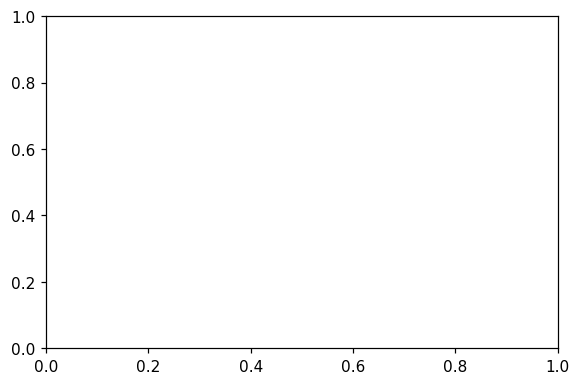

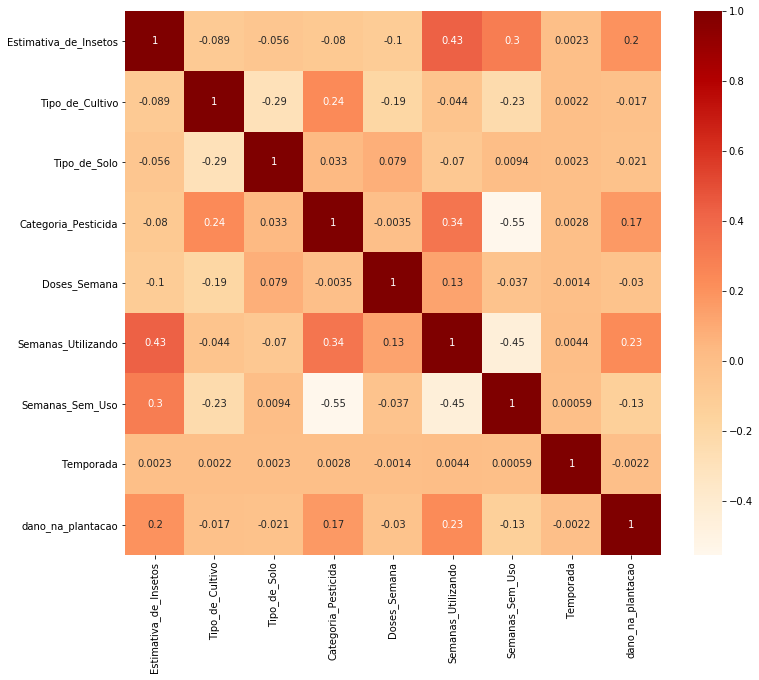

In [13]:
f, ax = plt.subplots(dpi=110)
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

In [14]:
#Dano na platação tem pouco relação com: Temporada, Tipo de Solo, tipo de cultivo, e doses na semana
data.columns
#obs. Tive dificuldade para tratar a coluna de Semanas_Utilizando

Index(['Estimativa_de_Insetos', 'Tipo_de_Cultivo', 'Tipo_de_Solo',
       'Categoria_Pesticida', 'Doses_Semana', 'Semanas_Utilizando',
       'Semanas_Sem_Uso', 'Temporada', 'dano_na_plantacao'],
      dtype='object')

In [15]:
data.drop(['Tipo_de_Cultivo','Tipo_de_Solo', 'Doses_Semana', 'Temporada', 'Semanas_Utilizando'], axis=1, inplace=True)
#Removendo colunas com pouca correlação

In [17]:
data.isnull().sum()
#Verificando dados nulos

Estimativa_de_Insetos       0
Categoria_Pesticida         0
Semanas_Sem_Uso             0
dano_na_plantacao        8858
dtype: int64

In [18]:
data

,Estimativa_de_Insetos,Categoria_Pesticida,Semanas_Sem_Uso,dano_na_plantacao
Identificador_Agricultor,,,,
SCROP00001,188,1,0,0.0
SCROP00002,209,1,0,1.0
SCROP00003,257,1,0,1.0
SCROP00004,257,1,0,1.0
SCROP00005,342,1,0,1.0
...,...,...,...,...
SCROP88854,3337,2,44,NaN
SCROP88855,3516,2,38,NaN
SCROP88856,3516,2,8,NaN


In [19]:
data = pd.get_dummies(data, columns=['Categoria_Pesticida'], drop_first=True)
#Transformando categóticos em Dummies

# Separando train e test 

In [24]:
train_dano = data.dropna()
#eliminando dados nulos

In [27]:
test_dano = data.loc[data['dano_na_plantacao'].isnull()].drop('dano_na_plantacao', axis=1)
#Separando apenas dados nulos

In [32]:
train_dano.shape, test_dano.shape

((80000, 5), (8858, 4))

# Definindo X e y para treinar o modelo

In [33]:
X = train_dano.drop('dano_na_plantacao', axis=1)

In [34]:
y = train_dano['dano_na_plantacao']

In [36]:
X.shape, y.shape
#separando o modelo para predição de danos. 

((80000, 4), (80000,))

In [37]:
from sklearn import linear_model

In [38]:
lm = linear_model.LinearRegression()
#instanciando o modelo

In [39]:
from sklearn.model_selection import train_test_split
#biblioteca que permite a separação dos dados de forma aleatória

In [40]:
#dividindo dados e testando dados 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
#separando os dados, se utilizarmos todos os dados que temos, nosso modelo ficará super adequado (Overfitting)
# X_train - O treino possui 70% dos dados e seu y sabe a resposta dos danos, está com os 30% de dados restantes.

In [42]:
lm.fit(X_train, y_train)
#TREINANDO O MODELO

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
pred=lm.predict(X_test)
pred.shape
#REALIZANDO A PREDIÇÃO DOS DANOS NA PLATAÇÃO

(24000,)

In [58]:
lm.score(X_test, y_test)
#Verificando o quão bem o modelo funcionou ... 
# :(

0.14370832743764927

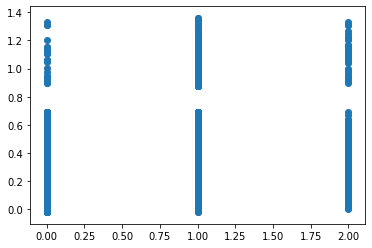

In [47]:
plt.scatter(y_test, pred)
plt.show()

# Aplicando nos dados nulos 

In [60]:
pred_dano = lm.predict(test_dano)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)

In [51]:
test_dano['dano_na_plantacao'] = pred_dano

In [53]:
#conferindo o shape
test_dano.shape, train_dano.shape

((8858, 5), (80000, 5))

In [54]:
dano = pd.concat([train_dano, test_dano], sort=False)
#concatenando dados com idade preenchidas

In [55]:
dano.shape

(88858, 5)

In [56]:
dano_plantacao = pd.DataFrame({'Identificador_Agricultor': dano.index, 'dano_na_plantacao': dano['dano_na_plantacao']})
#criando DataFrame com Id do Agricultor e Dano da Platação

In [57]:
dano

,Estimativa_de_Insetos,Semanas_Sem_Uso,dano_na_plantacao,Categoria_Pesticida_2,Categoria_Pesticida_3
Identificador_Agricultor,,,,,
SCROP00001,188,0,0.000000,0,0
SCROP00002,209,0,1.000000,0,0
SCROP00003,257,0,1.000000,0,0
SCROP00004,257,0,1.000000,0,0
SCROP00005,342,0,1.000000,0,0
...,...,...,...,...,...
SCROP88854,3337,44,0.274480,1,0
SCROP88855,3516,38,0.311313,1,0
SCROP88856,3516,8,0.385899,1,0


In [ ]:
# It was such a pleasure for me! Thanks for the challenge, I've Learned a Lot!